<a href="https://colab.research.google.com/github/savanigit/OIBSIP/blob/task-3-submission/Task_3_Car_Price_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Styling
plt.style.use('ggplot')
%matplotlib inline

print("Libraries imported!")

Libraries imported!


In [2]:
# Load the dataset
df = pd.read_csv('car data.csv')

# Show the first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [6]:
# 1. Convert text to numbers (Manual Encoding)
# We use a dictionary to tell Python what to swap
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
df.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# 2. Drop the Car_Name column (too messy)
df = df.drop(['Car_Name'], axis=1)

# 3. Check the final clean dataframe
df.head()

/tmp/ipython-input-64222072.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
/tmp/ipython-input-64222072.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
/tmp/ipython-input-64222072.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To op

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


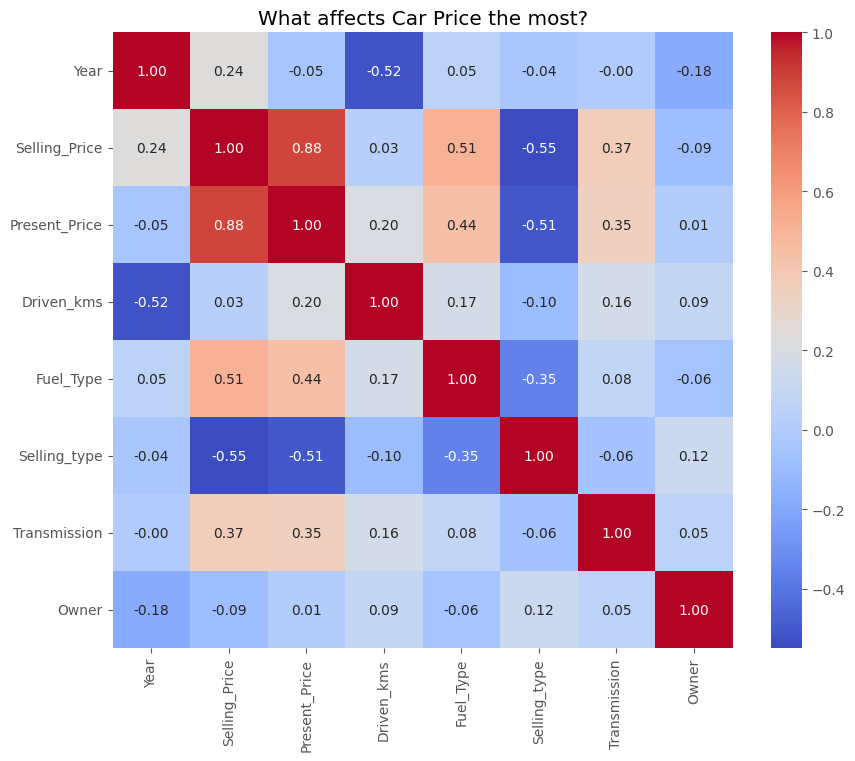

In [7]:
plt.figure(figsize=(10, 8))

# Calculate the correlation between all columns
correlations = df.corr()

# Draw the heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('What affects Car Price the most?')
plt.show()

In [8]:
# 1. Separate Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# 2. Split into Train (Study) and Test (Exam)
# We use 80% for study, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (240, 7)
Test Data Shape: (61, 7)


In [9]:
# 1. Initialize the model
model = LinearRegression()

# 2. Train it
model.fit(X_train, y_train)

print("Car Price Predictor is trained!")

Car Price Predictor is trained!


In [10]:
# 1. Make predictions on the test set
predictions = model.predict(X_test)

# 2. Check the Error Score (R-squared)
score = r2_score(y_test, predictions)

print("R-Squared Score:", score)

R-Squared Score: 0.8466902419662656
